In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import os
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [2]:
feature_path = '/home/DL-based-Tumor-Classification/Datasets/Newest_case/2D_reform/'
kamus = {'OSCC':1,'Non-oral':2,'Cervical':3,'EsophagealSCC':4,'EsophagealAdenocarcinoma':5,'EsophagealCancer':6}
cases = os.listdir(feature_path)
for case in cases:
    label_list=[]
    path = os.path.join(feature_path,case)
    if os.path.isdir(path) and not case.endswith(".ipynb_checkpoints") and not case.startswith("1"):
        predicted_label = []
        true_label = []
        output_path = feature_path + case
        
        for i in range(0,10):
            predicted_label_path = output_path+ '/img_fold' + str(i) + '/test/predicted_label_run_th1_test_multi_relu.csv'
            true_label_path = output_path+ '/img_fold' + str(i) + '/test/test_label_run_th1_test_multi_relu.csv'
            predicted_label_tmp = np.array(pd.read_csv(predicted_label_path, header=None)) + 1.0
            true_label_tmp = np.array(pd.read_csv(true_label_path, header=None)) + 1.0
            predicted_label.append(predicted_label_tmp)
            true_label.append(true_label_tmp)
        
        true_label_all = np.concatenate(true_label, axis=0)
        predicted_label_all = np.concatenate(predicted_label, axis=0)
        
        def draw_confusion_matrix(predicted_label_all,true_label_all):
            # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
            # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
            classes = case.split('+')
            for kelas in classes:
                label_list.append(kamus[kelas])
            cnf_matrix = confusion_matrix(true_label_all, predicted_label_all, labels = label_list)
            cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
            for i,kelas in enumerate(classes):
                if (kelas == 'EsophagealAdenocarcinoma'):
                    classes[i] = 'Esophageal\nAdenocarcinoma'
                if (kelas == 'EsophagealCancer'):
                    classes[i] = 'Esophageal\nCancer'
                if (kelas == 'Non-oral'):
                    classes[i] = 'Non-oral SCC'
                if (kelas == 'Cervical'):
                    classes[i] = 'Cervical SCC'
                if (kelas == 'EsophagealSCC'):
                    classes[i] = 'Esophageal SCC'
            plt.figure(dpi = 150)
            plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
            plt.title('Classification Confusion Matrix')
            plt.colorbar()
            tick_marks = np.arange(len(classes))
            for i in range(len(classes)):
                for j in range(len(classes)):
                    number = round(cnf_matrix[i,j],2)
                    text = plt.text(j, i, number, ha="center", va="center", color="black")
            plt.xticks(tick_marks, classes, rotation=90)
            plt.yticks(tick_marks, classes)
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')
#             plt.savefig(output_path + "/" + case + ".png", format='png', dpi = 400)
            plt.show()
            return cnf_matrix
        
        cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
        precision_s = precision_score(true_label_all, predicted_label_all, average='weighted')
        recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
        f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
        accuracy = accuracy_score(true_label_all, predicted_label_all)
        accuracy_each_class = cnf_matrix.diagonal()
        
        print(accuracy, "///", precision_s, "///", recall_s, "///", f1)
        text_file = open(output_path+"/Test_Performance.txt","w")
        text_file.write("Accuracy: {} \nPrecision: {}\nRecall: {} \nF1 Score: {} \n{}\t {}\t {}\t {}".format(accuracy,precision_s,recall_s,f1,accuracy,precision_s,recall_s,f1))
        text_file.close()

KeyError: 'Other'

In [33]:
print(accuracy, "///", precision_s, "///", recall_s, "///", f1)
text_file = open(output_path+"/Test_Performance.txt","w")
text_file.write("Accuracy: {} \nPrecision: {}\nRecall: {} \nF1 Score: {}".format(accuracy,precision_s,recall_s,f1))
text_file.close()

0.8981481481481481 /// 0.9180658436213991 /// 0.8981481481481481 /// 0.8987747669798566


In [10]:
print(accuracy, "///", precision_s, "///", recall_s, "///", f1)

0.8125 /// 0.8100246590976636 /// 0.8125 /// 0.8110554308559016


In [13]:
print(accuracy, "///", precision_s, "///", recall_s, "///", f1)

0.993514915693904 /// 0.9935350740094111 /// 0.993514915693904 /// 0.9935053827212266


In [17]:
print(accuracy, "///", precision_s, "///", recall_s, "///", f1)

0.9838945827232797 /// 0.9839173923094706 /// 0.9838945827232797 /// 0.9839007986490476


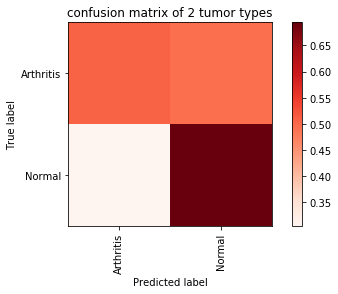

In [4]:
predicted_label = []
true_label = []
output_path = '/home/DL-based-Tumor-Classification/Datasets/trial_3rd_8960_true_feature/'
for i in range(0,8):
    predicted_label_path = output_path+ '/img_fold' + str(i) + '/test/predicted_label_run_th1_test.csv'
    true_label_path = output_path+ '/img_fold' + str(i) + '/test/test_label_run_th1_test.csv'
    predicted_label_tmp = np.array(pd.read_csv(predicted_label_path, header=None)) + 1.0
    true_label_tmp = np.array(pd.read_csv(true_label_path, header=None)) + 1.0
    predicted_label.append(predicted_label_tmp)
    true_label.append(true_label_tmp)

true_label_all = np.concatenate(true_label, axis=0)
predicted_label_all = np.concatenate(predicted_label, axis=0)


def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
    classes = ['Arthritis', 'Normal']
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('confusion matrix of 2 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
precision_s = precision_score(true_label_all, predicted_label_all, average='weighted')
recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
accuracy = accuracy_score(true_label_all, predicted_label_all)
accuracy_each_class = cnf_matrix.diagonal()

In [5]:
print(f1, "///", accuracy, "///", precision_s, "///", recall_s)

0.5999692077192113 /// 0.6036585365853658 /// 0.6039771784545305 /// 0.6036585365853658


In [6]:
predicted_label = []
true_label = []
output_path = '/home/DL-based-Tumor-Classification/trial_2nd_8843_true_feature/'
for i in range(0,9):
    predicted_label_path = '/home/DL-based-Tumor-Classification/3rd_8966_feature_noanno_threshold1/img_fold' + str(i) + '/test/predicted_label_run_th1.csv'
    true_label_path = '/home/DL-based-Tumor-Classification/3rd_8966_feature_noanno_threshold1/img_fold' + str(i) + '/test/test_label_run_th1.csv'
    predicted_label_tmp = np.array(pd.read_csv(predicted_label_path, header=None)) + 1.0
    true_label_tmp = np.array(pd.read_csv(true_label_path, header=None)) + 1.0
    predicted_label.append(predicted_label_tmp)
    true_label.append(true_label_tmp)

true_label_all = np.concatenate(true_label, axis=0)
predicted_label_all = np.concatenate(predicted_label, axis=0)


def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
    classes = ['Adenocarcinoma', 'Carcinoma']
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('confusion matrix of 2 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
precision_s = precision_score(true_label_all, predicted_label_all, average='weighted')
recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
accuracy = accuracy_score(true_label_all, predicted_label_all)
accuracy_each_class = cnf_matrix.diagonal()

FileNotFoundError: File b'/home/DL-based-Tumor-Classification/3rd_8966_feature_noanno_threshold1/img_fold0/test/predicted_label_run_th1.csv' does not exist

In [11]:
print(f1, "///", accuracy, "///", precision_s, "///", recall_s)

0.616381282099266 /// 0.6195652173913043 /// 0.6204773301422684 /// 0.6195652173913043
